## Importando os dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv', index_col=0)

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1169,7.6,0.500,0.29,2.3,0.086,5.0,14.0,0.99502,3.32,0.62,11.5,0
1510,6.4,0.360,0.21,2.2,0.047,26.0,48.0,0.99661,3.47,0.77,9.7,0
982,7.3,0.520,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9,0
1520,6.5,0.530,0.06,2.0,0.063,29.0,44.0,0.99489,3.38,0.83,10.3,0
283,8.9,0.400,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
997,5.6,0.660,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,1
915,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,0
640,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,0
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,1


In [4]:
counts = df.quality.value_counts(normalize=True)
counts

0    0.864164
1    0.135836
Name: quality, dtype: float64

In [5]:
X = df.drop(columns='quality')
y = df.loc[:, 'quality'].to_numpy()

X.shape, y.shape

((1119, 11), (1119,))

In [6]:
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1169,7.6,0.50,0.29,2.3,0.086,5.0,14.0,0.99502,3.32,0.62,11.5
1510,6.4,0.36,0.21,2.2,0.047,26.0,48.0,0.99661,3.47,0.77,9.7
982,7.3,0.52,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9
1520,6.5,0.53,0.06,2.0,0.063,29.0,44.0,0.99489,3.38,0.83,10.3
283,8.9,0.40,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5


### Plotando o boxplot de uma das colunas

Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

**OBS**: Na referencia acima, podemos ver como visualizar vários gráficos diferentes (a maneira é bem semelhante, só muda o nome da função)

Basta chamar a função boxplot e passar no argumento '**column**' o nome da coluna

<AxesSubplot:>

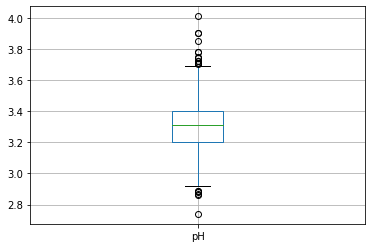

In [7]:
X.boxplot(column='pH') 

Pode-se plotar várias colunas de uma vez, usando uma **lista**

<AxesSubplot:>

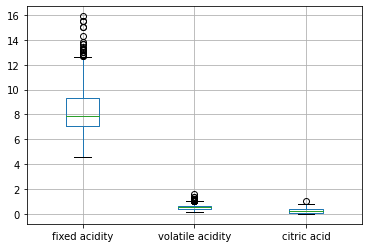

In [8]:
X.boxplot(column=['fixed acidity', 'volatile acidity', 'citric acid']) 

### Plotando cada coluna em um gráfico separado:

Bibliotecas auxiliares:
- matplotlib: visualização dos dados
- math: operações matemáticas

In [9]:
import matplotlib.pyplot as plt
import math

In [10]:
colunas = list(X.columns)
len(colunas)

11

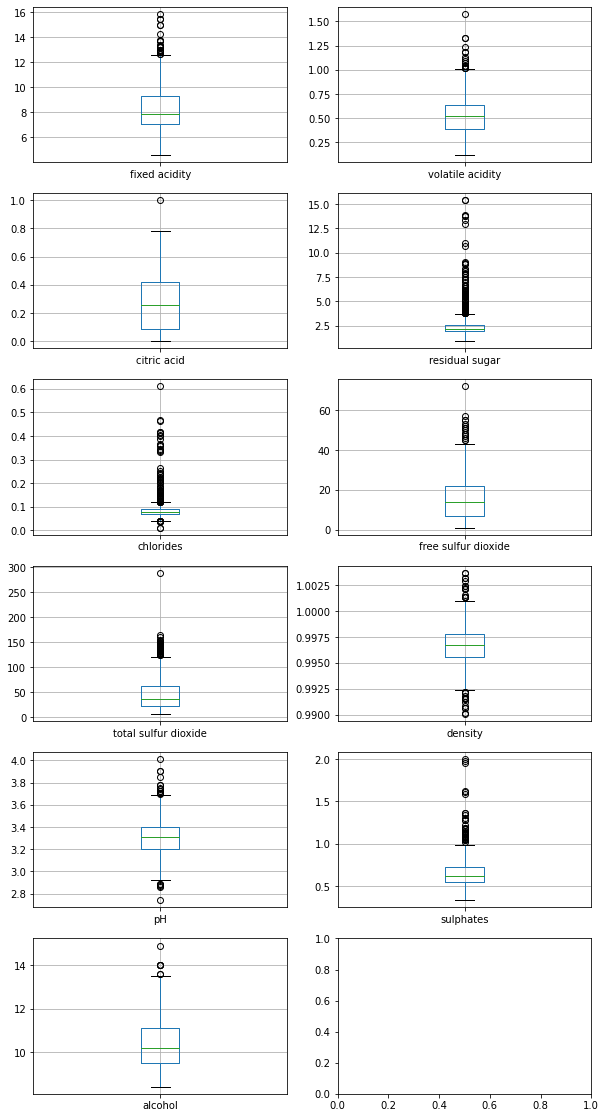

In [11]:
fig, axes = plt.subplots(nrows= math.ceil(len(colunas)/2), ncols=2, figsize=(10,20))

for i, coluna in enumerate(colunas):
    X.boxplot(ax=axes[i//2, i%2], column=coluna)
